In [18]:
#import libariries 
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import random

Start reading images

In [19]:
def ReadImages (machineproject_path, str):
    # Construct the paths to the images folder
    images_folder = os.path.join(machineproject_path, str, "images")

    # Initialize list for images
    image_list = []
    
    # Iterate through image files
    for image_file in os.listdir(images_folder):
        image_file_path = os.path.join(images_folder, image_file)

        # Append the image filename to the image list
        image_list.append(image_file_path)

    return image_list

Extract Features Using Sift Algorithm

In [20]:
def extract_sift_features(images):
    sift = cv2.SIFT_create()
    features = []

    for image_file_path in images:
        try:
            img = cv2.imread(image_file_path, cv2.IMREAD_GRAYSCALE)

            # Check if the image is loaded successfully
            if img is None:
                print(f"Error loading image: {image_file_path}")
                features.append(np.array([]))
                continue

            # Check if the image is not empty
            if img.size == 0:
                print(f"Empty image: {image_file_path}")
                features.append(np.array([]))
                continue

            keypoints, descriptors = sift.detectAndCompute(img, None)

            # Check if keypoints and descriptors are obtained
            if descriptors is not None and descriptors.shape[0] > 0:
                # Pad or truncate descriptors to a fixed size (128)
                descriptor_size = 128
                if descriptors.shape[0] < descriptor_size:
                    descriptors = np.pad(descriptors, ((0, descriptor_size - descriptors.shape[0]), (0, 0)))
                elif descriptors.shape[0] > descriptor_size:
                    descriptors = descriptors[:descriptor_size, :]
                features.append(descriptors.flatten())
            else:
                print(f"No keypoints or descriptors found for image: {image_file_path}")
                features.append(np.zeros(128))  # Use a placeholder value for empty cases

        except Exception as e:
            print(f"Error processing image: {image_file_path}, Exception: {str(e)}")
            features.append(np.zeros(128))  # Use a placeholder value for exceptions

    return np.array(features)


Start removing empty features 

In [21]:
#check if size of features > 0 , then it will be non empty img 
def remove_empty(features):
    non_empty_indices = [i for i, f in enumerate(features) if f.size > 0]
    return features[non_empty_indices]

In [22]:
machineproject_path = 'E:\\.college\\ML_Project\\TomatoDetection'

In [23]:
xtrain = ReadImages(machineproject_path, 'trainKmeans')
xtrain_features = extract_sift_features(xtrain)
xtrain_features = remove_empty(xtrain_features)

Start standraization 

In [24]:
# Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(xtrain_features)


Start removing outliers

In [25]:
def iqr_outlier_removal(data, k=1.5):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - k * iqr
    upper_bound = q3 + k * iqr
    return (data >= lower_bound) & (data <= upper_bound)

# Perform IQR outlier removal
iqr_mask = iqr_outlier_removal(X_train_scaled)

# Apply the mask to remove outliers
X_train_no_outliers_iqr = X_train_scaled[iqr_mask]


In [26]:
# Randomly sample a subset of data
sample_size = 9000  # Adjust the sample size as needed
random.seed(42)  # Set a seed for reproducibility
sample_indices = random.sample(range(X_train_scaled.shape[0]), sample_size)
X_train_sampled = X_train_scaled[sample_indices, :]

Apply PCA in our data

In [40]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train_sampled)


Try n numbers of clusters to check the silhouette score

In [41]:
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train_pca)
    silhouette_score_value = silhouette_score(X_train_pca, kmeans.labels_)
    print(f"Silhouette Score for {n_clusters} clusters: {silhouette_score_value}")

c:\Users\MAKKA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 2 clusters: 0.6198291182518005


c:\Users\MAKKA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 3 clusters: 0.5998668074607849


c:\Users\MAKKA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 4 clusters: 0.491154283285141


c:\Users\MAKKA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 5 clusters: 0.4352688789367676


c:\Users\MAKKA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 6 clusters: 0.4381546378135681


c:\Users\MAKKA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 7 clusters: 0.41311535239219666


c:\Users\MAKKA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 8 clusters: 0.4159291684627533


c:\Users\MAKKA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 9 clusters: 0.3835398256778717


c:\Users\MAKKA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 10 clusters: 0.38573864102363586


Choose _cluster = 2 due to high score

In [42]:
kmeans = KMeans (n_clusters=2 , random_state= 42)

Model Visualization

c:\Users\MAKKA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


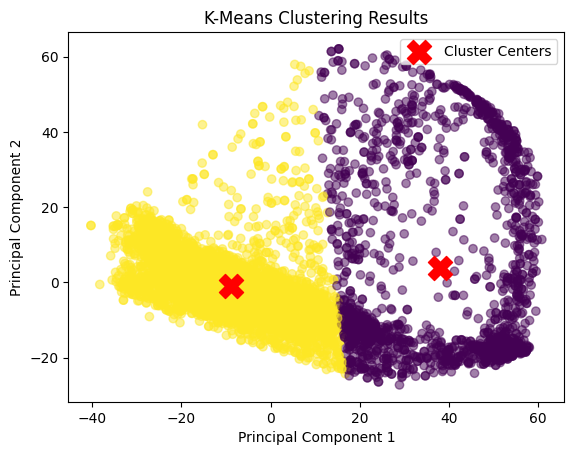

In [44]:
# Get the cluster labels for each data point
kmeans.fit(X_train_pca)
cluster_labels = kmeans.labels_

# Visualize data points and clusters
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Cluster Centers')
plt.title('K-Means Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
